In [44]:
#import the library 
library("ggplot2")
library("dplyr")
library("wesanderson")

In [45]:
hsp <- read.csv('hsp70_for_R.csv')
linc7 <- read.csv('linc7_for_R.csv')

In [46]:
hsp

X,Time,fc,std
0,15 min,135.6842,137.76557
1,180 min,1036.7653,56.80342
2,30 min,551.4928,419.32528


In [47]:
hsp <- hsp %>%
mutate(sem=std/sqrt(3))
hsp

X,Time,fc,std,sem
0,15 min,135.6842,137.76557,79.53899
1,180 min,1036.7653,56.80342,32.79547
2,30 min,551.4928,419.32528,242.09756


In [48]:
linc7 <- linc7 %>%
mutate(sem=std/sqrt(3))
linc7

X,Time,fc,std,sem
0,15 min,1.648082,0.1967127,0.1135721
1,180 min,5.151033,0.4367098,0.2521345
2,30 min,3.069897,0.5117324,0.2954489


Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.


Saving 6.67 x 6.67 in image


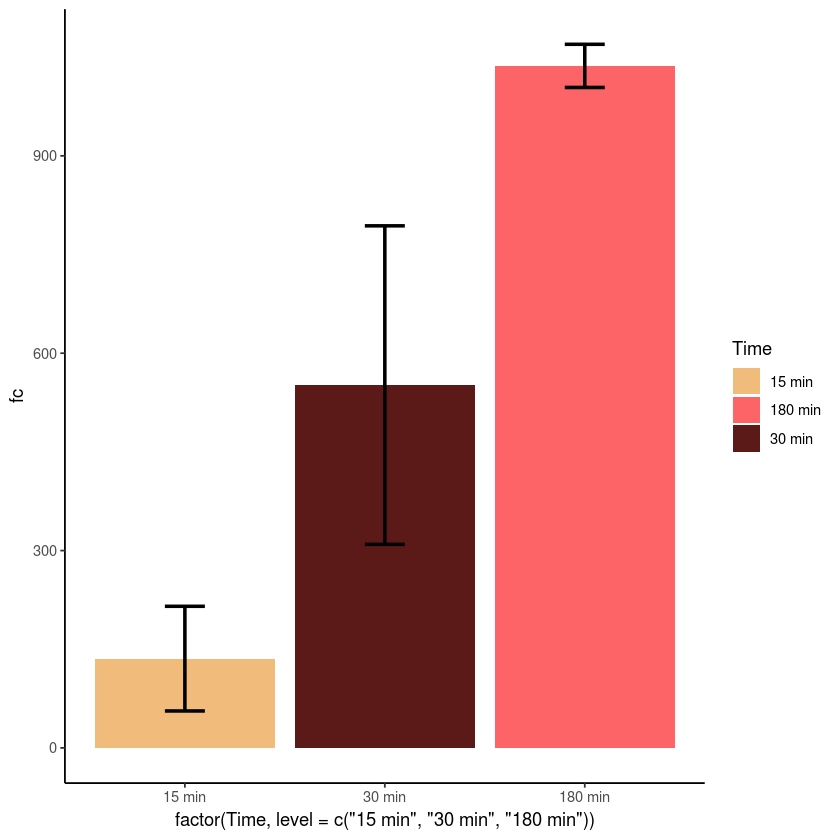

In [53]:
p <- ggplot(data=hsp, aes(x = factor(Time, level= c('15 min','30 min','180 min')), y = fc, fill=Time))  + geom_bar(stat = "identity") +  scale_fill_brewer(palette="Greys")
p <- p + geom_errorbar(data=hsp, mapping=aes(x=Time, ymin=(fc-sem), ymax=(fc+sem)), width=0.2, size=1, color="black") + theme_classic()
p <- p +  scale_fill_manual(values = wes_palette("GrandBudapest1"))  + theme_classic() 
p
ggsave('hsp70_time_course.jpeg')

Saving 6.67 x 6.67 in image


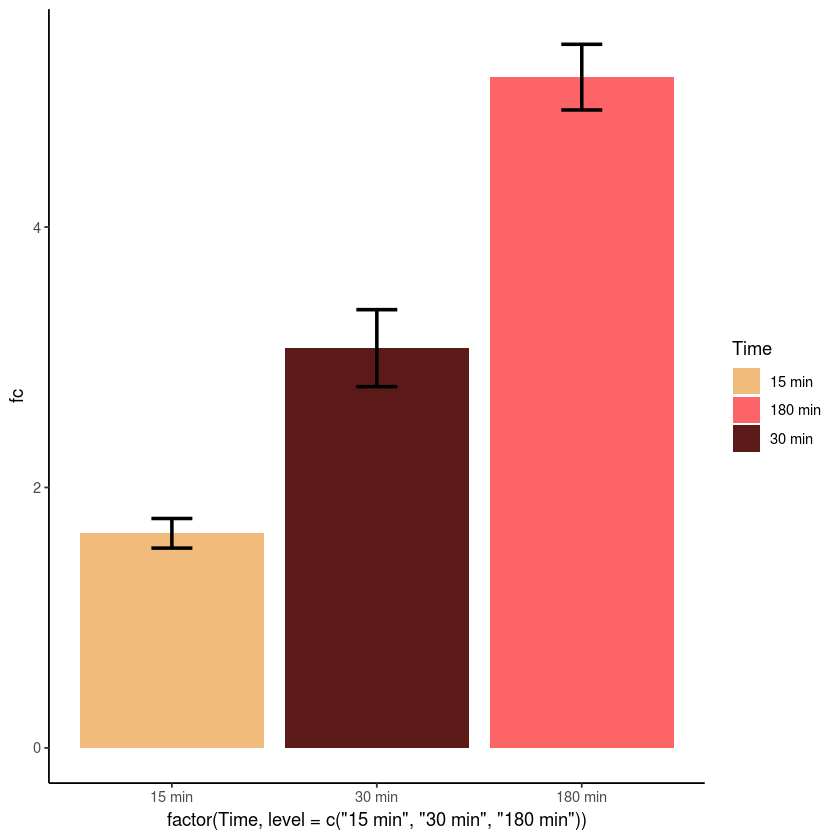

In [52]:
q <- ggplot(data=linc7, aes(x = factor(Time, level=c("15 min",'30 min','180 min')), y = fc, fill=Time))  + geom_bar(stat = "identity") #+  scale_fill_brewer(palette = 'Reds' )
q <- q + geom_errorbar(data=linc7, mapping=aes(x=Time, ymin=(fc-sem), ymax=(fc+sem)), width=0.2, size=1, color="black") + theme_classic()
q <- q +  scale_fill_manual(values = wes_palette("GrandBudapest1"))  + theme_classic() 

q
ggsave('linc7_time_course.jpeg')